In [1]:
"Project for JP - ABW"

'Project for JP - ABW'

In [2]:
from backend.utils.ifa_meander_project_v2.geometry import *
from backend.utils.ifa_meander_project_v2.frequency import *
from backend.utils.ifa_meander_project_v2.algorithms import *

In [3]:
fLow = 790e6
fHigh = 940e6
fC = 868e6
step = 2e6

"""fLow = 373e6
fHigh = 490e6
fC = 433e6
step = 10e6"""

"""fLow = 430e6
fHigh = 436e6
fC = 433e6
step = 1e6"""


frequencies, fc_index, nPoints = generate_frequencies(fLow, fHigh, fC, step)

print(f"Number of frequencies (nPoints): {nPoints}")
print(f"Index of fC: {fc_index}")

Number of frequencies (nPoints): 76
Index of fC: 39


In [4]:
mesh_name = "JP_meander_ifa_optim_868.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/JP_meander_ifa_optim_868.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [5]:
terminal_a = 50 / 1000
terminal_b = 40 / 1000  # width of the free space

a = 9 / 1000
ratio = a / terminal_a
b = terminal_b

x_t = np.array([-terminal_a + a, 0, 0, -terminal_a + a])
y_t = np.array([terminal_b, terminal_b, 0, 0])

"""# Fix the short feed and the track width
if b / a > 2:
    largeur_piste    = a / 15          # Minimum value    
    distance_meandre = a / 15          # Value chosen based on the result from analyse_dist_meandre.ipynb
else:
    largeur_piste    = a / 25         # Minimum value    
    distance_meandre = a / 25         # Value chosen based on the result from analyse_dist_meandre.ipynb"""

"""largeur_piste    = a / 12
distance_meandre = a / 12"""

"""largeur_piste    = a / 18
distance_meandre = a / 18"""

"""largeur_piste    = a / 7
distance_meandre = a / 7"""

largeur_piste = initial_ifa_parameters(a, fC)
distance_meandre = initial_ifa_parameters(a, fC)

feed = 0.85 * b
feed_point = np.array([0, feed, 0])
mesh_size = largeur_piste * 3                # ratio if ratio <= 0.33
# mesh_size = (2.2 + b / a) * largeur_piste  # ratio if ratio > 0.33

# mesh_size = 2.5 / 1000

# Display values
print(f"Terminal a = {terminal_a * 1000:.2f} mm")
print(f"Terminal b = {terminal_b * 1000:.2f} mm")
print(f"ratio = {ratio:.2f}")
print(f"a = {a * 1000:.2f} mm")
print(f"b = {b * 1000:.2f} mm")
print(f"Track width = {largeur_piste * 1000:.2f} mm")
print(f"Meander distance = {distance_meandre * 1000:.2f} mm")
print(f"Feed = {feed * 1000:.2f} mm")
print(f"Mesh size = {mesh_size * 1000:.2f} mm")

Terminal a = 50.00 mm
Terminal b = 40.00 mm
ratio = 0.18
a = 9.00 mm
b = 40.00 mm
Track width = 1.29 mm
Meander distance = 1.29 mm
Feed = 34.00 mm
Mesh size = 3.86 mm


In [6]:
filename_log = f"data/log_optimization_JP/optimization_results_JP_{ratio}.json"

In [7]:
Z_adapt = 50 # Ohms

last_impedances = optimize_ifa_input_impedance(ifa_meander_msh, ifa_meander_mat,
             frequencies, fC, fLow, fHigh, nPoints, fc_index,
             a, b, largeur_piste, distance_meandre, feed, feed_point, x_t, y_t, save_mesh_folder, mesh_name, mesh_size, Z0=Z_adapt, filename=filename_log)


------------------------------------------------------Iteration N°1------------------------------------------------------

distance meanders = 1.286 mm

Number of meanders = 3

New distance meanders = 1.714 mm
IFA track width = 1.286 mm
feed position = 34.000 mm

Z0 = 50 Ohms
Simulation 1/76 | f = 790.00 MHz | S11 = -0.03 dB
Simulation 2/76 | f = 792.00 MHz | S11 = -0.04 dB
Simulation 3/76 | f = 794.00 MHz | S11 = -0.04 dB
Simulation 4/76 | f = 796.00 MHz | S11 = -0.04 dB
Simulation 5/76 | f = 798.00 MHz | S11 = -0.04 dB
Simulation 6/76 | f = 800.00 MHz | S11 = -0.04 dB
Simulation 7/76 | f = 802.00 MHz | S11 = -0.04 dB
Simulation 8/76 | f = 804.00 MHz | S11 = -0.04 dB
Simulation 9/76 | f = 806.00 MHz | S11 = -0.04 dB
Simulation 10/76 | f = 808.00 MHz | S11 = -0.04 dB
Simulation 11/76 | f = 810.00 MHz | S11 = -0.05 dB
Simulation 12/76 | f = 812.00 MHz | S11 = -0.05 dB
Simulation 13/76 | f = 814.00 MHz | S11 = -0.05 dB
Simulation 14/76 | f = 816.00 MHz | S11 = -0.05 dB
Simulation 15/76 

Simulation 40/76 | f = 868.00 MHz | S11 = -0.12 dB
Simulation 41/76 | f = 870.00 MHz | S11 = -0.13 dB
Simulation 42/76 | f = 872.00 MHz | S11 = -0.13 dB
Simulation 43/76 | f = 874.00 MHz | S11 = -0.14 dB
Simulation 44/76 | f = 876.00 MHz | S11 = -0.15 dB
Simulation 45/76 | f = 878.00 MHz | S11 = -0.15 dB
Simulation 46/76 | f = 880.00 MHz | S11 = -0.16 dB
Simulation 47/76 | f = 882.00 MHz | S11 = -0.16 dB
Simulation 48/76 | f = 884.00 MHz | S11 = -0.17 dB
Simulation 49/76 | f = 886.00 MHz | S11 = -0.18 dB
Simulation 50/76 | f = 888.00 MHz | S11 = -0.19 dB
Simulation 51/76 | f = 890.00 MHz | S11 = -0.19 dB
Simulation 52/76 | f = 892.00 MHz | S11 = -0.20 dB
Simulation 53/76 | f = 894.00 MHz | S11 = -0.21 dB
Simulation 54/76 | f = 896.00 MHz | S11 = -0.22 dB
Simulation 55/76 | f = 898.00 MHz | S11 = -0.23 dB
Simulation 56/76 | f = 900.00 MHz | S11 = -0.24 dB
Simulation 57/76 | f = 902.00 MHz | S11 = -0.25 dB
Simulation 58/76 | f = 904.00 MHz | S11 = -0.27 dB
Simulation 59/76 | f = 906.00 M


📡 Simulation results:
→ Resonance frequency = 940.00 MHz
→ Impedance at f_res  = 6.23+70.63j Ω


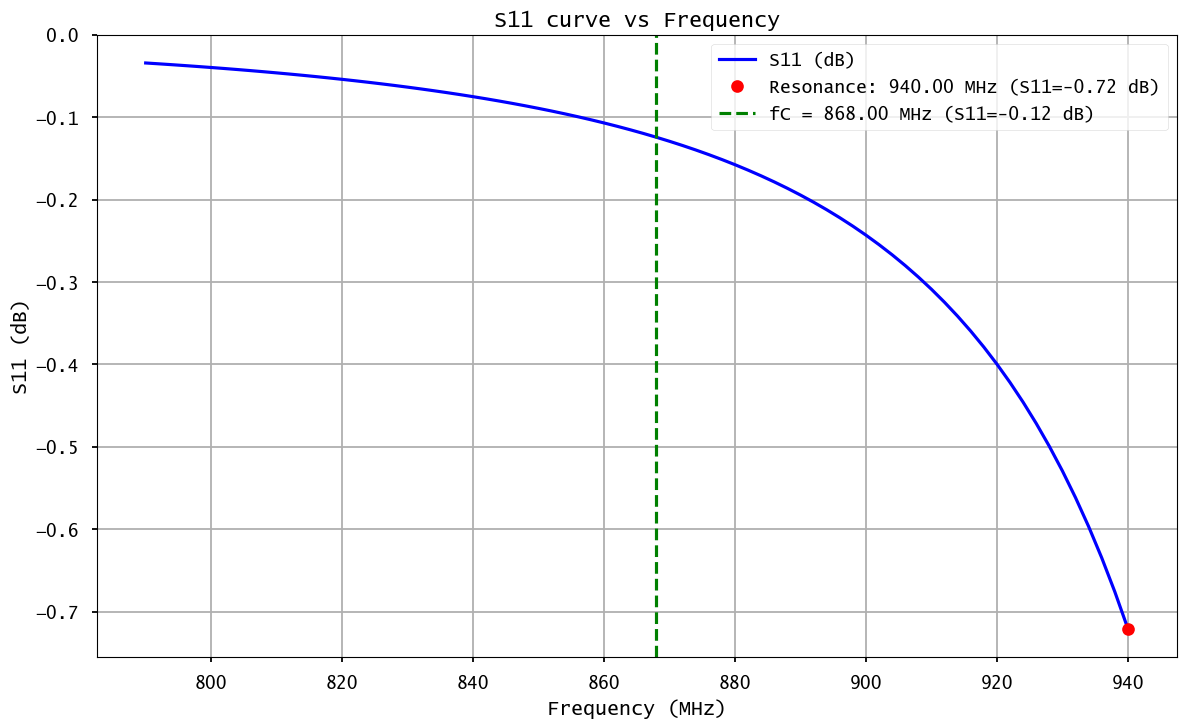


Ratio = 1.0829493087557605


We are FAR from fc!


------------------------------------------------------Iteration N°2------------------------------------------------------

distance meanders = 1.096 mm

Number of meanders = 4

New distance meanders = 1.154 mm
IFA track width = 1.096 mm
feed position = 34.000 mm

Z0 = 50 Ohms
Simulation 1/76 | f = 790.00 MHz | S11 = -0.07 dB
Simulation 2/76 | f = 792.00 MHz | S11 = -0.08 dB
Simulation 3/76 | f = 794.00 MHz | S11 = -0.08 dB
Simulation 4/76 | f = 796.00 MHz | S11 = -0.08 dB
Simulation 5/76 | f = 798.00 MHz | S11 = -0.09 dB
Simulation 6/76 | f = 800.00 MHz | S11 = -0.09 dB
Simulation 7/76 | f = 802.00 MHz | S11 = -0.10 dB
Simulation 8/76 | f = 804.00 MHz | S11 = -0.10 dB
Simulation 9/76 | f = 806.00 MHz | S11 = -0.11 dB
Simulation 10/76 | f = 808.00 MHz | S11 = -0.11 dB
Simulation 11/76 | f = 810.00 MHz | S11 = -0.12 dB
Simulation 12/76 | f = 812.00 MHz | S11 = -0.12 dB
Simulation 13/76 | f = 814.00 MHz | S11 = -0.13 dB
Simulation 14/76 

Simulation 40/76 | f = 868.00 MHz | S11 = -0.93 dB
Simulation 41/76 | f = 870.00 MHz | S11 = -1.04 dB
Simulation 42/76 | f = 872.00 MHz | S11 = -1.16 dB
Simulation 43/76 | f = 874.00 MHz | S11 = -1.31 dB
Simulation 44/76 | f = 876.00 MHz | S11 = -1.47 dB
Simulation 45/76 | f = 878.00 MHz | S11 = -1.67 dB
Simulation 46/76 | f = 880.00 MHz | S11 = -1.90 dB
Simulation 47/76 | f = 882.00 MHz | S11 = -2.18 dB
Simulation 48/76 | f = 884.00 MHz | S11 = -2.51 dB
Simulation 49/76 | f = 886.00 MHz | S11 = -2.91 dB
Simulation 50/76 | f = 888.00 MHz | S11 = -3.39 dB
Simulation 51/76 | f = 890.00 MHz | S11 = -3.96 dB
Simulation 52/76 | f = 892.00 MHz | S11 = -4.65 dB
Simulation 53/76 | f = 894.00 MHz | S11 = -5.45 dB
Simulation 54/76 | f = 896.00 MHz | S11 = -6.36 dB
Simulation 55/76 | f = 898.00 MHz | S11 = -7.34 dB
Simulation 56/76 | f = 900.00 MHz | S11 = -8.25 dB
Simulation 57/76 | f = 902.00 MHz | S11 = -8.87 dB
Simulation 58/76 | f = 904.00 MHz | S11 = -8.98 dB
Simulation 59/76 | f = 906.00 M


📡 Simulation results:
→ Resonance frequency = 904.00 MHz
→ Impedance at f_res  = 46.56-36.54j Ω


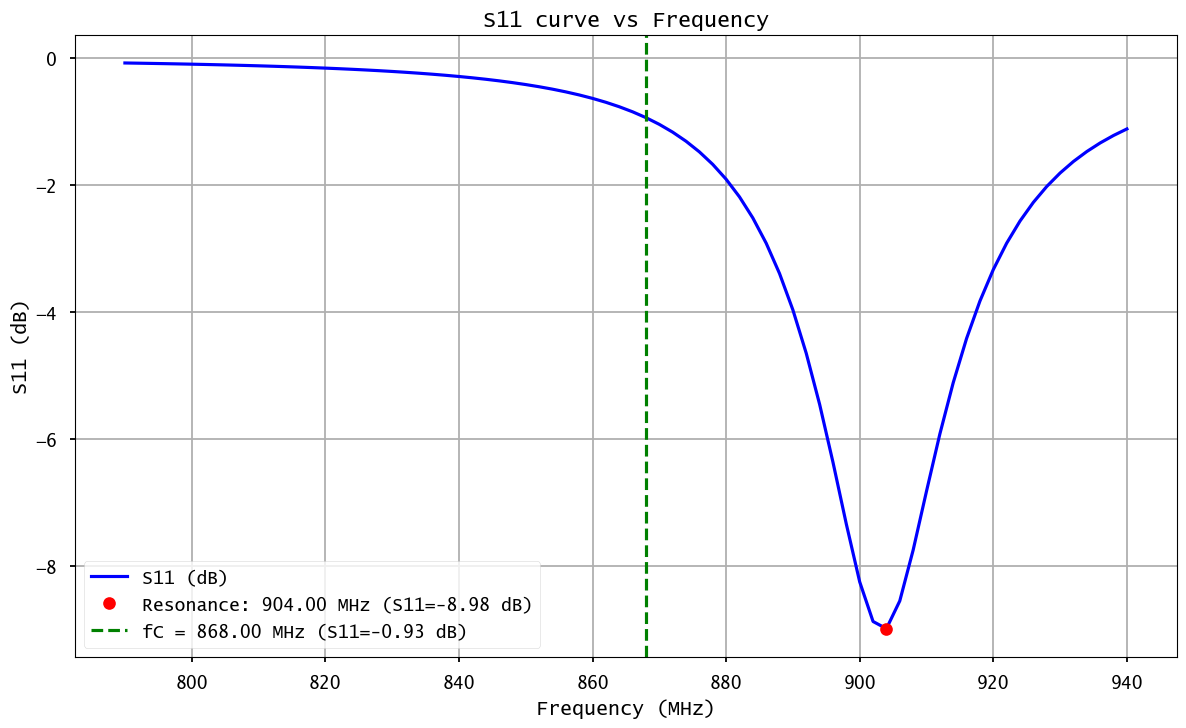


Ratio = 1.0414746543778801


We are within 2% of fc!


Extreme border reached


------------------------------------------------------Iteration N°3------------------------------------------------------

distance meanders = 1.011 mm

Number of meanders = 4

New distance meanders = 1.239 mm
IFA track width = 1.011 mm
feed position = 35.856 mm

Z0 = 50 Ohms
Simulation 1/76 | f = 790.00 MHz | S11 = -0.07 dB
Simulation 2/76 | f = 792.00 MHz | S11 = -0.08 dB
Simulation 3/76 | f = 794.00 MHz | S11 = -0.08 dB
Simulation 4/76 | f = 796.00 MHz | S11 = -0.09 dB
Simulation 5/76 | f = 798.00 MHz | S11 = -0.09 dB
Simulation 6/76 | f = 800.00 MHz | S11 = -0.10 dB
Simulation 7/76 | f = 802.00 MHz | S11 = -0.10 dB
Simulation 8/76 | f = 804.00 MHz | S11 = -0.11 dB
Simulation 9/76 | f = 806.00 MHz | S11 = -0.12 dB
Simulation 10/76 | f = 808.00 MHz | S11 = -0.13 dB
Simulation 11/76 | f = 810.00 MHz | S11 = -0.13 dB
Simulation 12/76 | f = 812.00 MHz | S11 = -0.14 dB
Simulation 13/76 | f = 814.00 MHz | S11

Simulation 40/76 | f = 868.00 MHz | S11 = -4.65 dB
Simulation 41/76 | f = 870.00 MHz | S11 = -5.98 dB
Simulation 42/76 | f = 872.00 MHz | S11 = -7.82 dB
Simulation 43/76 | f = 874.00 MHz | S11 = -10.33 dB
Simulation 44/76 | f = 876.00 MHz | S11 = -13.34 dB
Simulation 45/76 | f = 878.00 MHz | S11 = -14.52 dB
Simulation 46/76 | f = 880.00 MHz | S11 = -12.15 dB
Simulation 47/76 | f = 882.00 MHz | S11 = -9.32 dB
Simulation 48/76 | f = 884.00 MHz | S11 = -7.15 dB
Simulation 49/76 | f = 886.00 MHz | S11 = -5.59 dB
Simulation 50/76 | f = 888.00 MHz | S11 = -4.44 dB
Simulation 51/76 | f = 890.00 MHz | S11 = -3.59 dB
Simulation 52/76 | f = 892.00 MHz | S11 = -2.95 dB
Simulation 53/76 | f = 894.00 MHz | S11 = -2.46 dB
Simulation 54/76 | f = 896.00 MHz | S11 = -2.08 dB
Simulation 55/76 | f = 898.00 MHz | S11 = -1.78 dB
Simulation 56/76 | f = 900.00 MHz | S11 = -1.54 dB
Simulation 57/76 | f = 902.00 MHz | S11 = -1.34 dB
Simulation 58/76 | f = 904.00 MHz | S11 = -1.18 dB
Simulation 59/76 | f = 906.


📡 Simulation results:
→ Resonance frequency = 878.00 MHz
→ Impedance at f_res  = 55.58-19.38j Ω


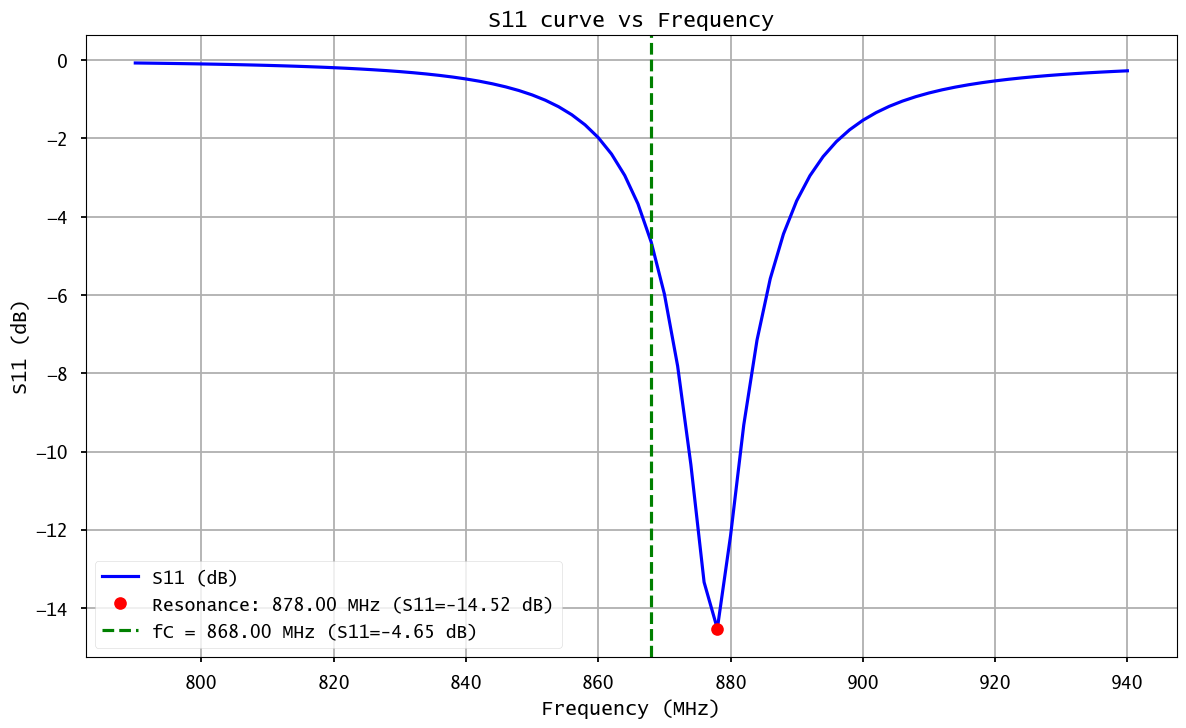


Ratio = 1.0115207373271888


We are within 2% of fc!


Extreme border reached


------------------------------------------------------Iteration N°4------------------------------------------------------

distance meanders = 0.988 mm

Number of meanders = 4

New distance meanders = 1.262 mm
IFA track width = 0.988 mm
feed position = 35.984 mm

Z0 = 50 Ohms
Simulation 1/76 | f = 790.00 MHz | S11 = -0.07 dB
Simulation 2/76 | f = 792.00 MHz | S11 = -0.07 dB
Simulation 3/76 | f = 794.00 MHz | S11 = -0.08 dB
Simulation 4/76 | f = 796.00 MHz | S11 = -0.08 dB
Simulation 5/76 | f = 798.00 MHz | S11 = -0.09 dB
Simulation 6/76 | f = 800.00 MHz | S11 = -0.09 dB
Simulation 7/76 | f = 802.00 MHz | S11 = -0.10 dB
Simulation 8/76 | f = 804.00 MHz | S11 = -0.11 dB
Simulation 9/76 | f = 806.00 MHz | S11 = -0.11 dB
Simulation 10/76 | f = 808.00 MHz | S11 = -0.12 dB
Simulation 11/76 | f = 810.00 MHz | S11 = -0.13 dB
Simulation 12/76 | f = 812.00 MHz | S11 = -0.14 dB
Simulation 13/76 | f = 814.00 MHz | S11

Simulation 40/76 | f = 868.00 MHz | S11 = -5.02 dB
Simulation 41/76 | f = 870.00 MHz | S11 = -6.59 dB
Simulation 42/76 | f = 872.00 MHz | S11 = -8.83 dB
Simulation 43/76 | f = 874.00 MHz | S11 = -12.05 dB
Simulation 44/76 | f = 876.00 MHz | S11 = -15.67 dB
Simulation 45/76 | f = 878.00 MHz | S11 = -14.92 dB
Simulation 46/76 | f = 880.00 MHz | S11 = -11.22 dB
Simulation 47/76 | f = 882.00 MHz | S11 = -8.33 dB
Simulation 48/76 | f = 884.00 MHz | S11 = -6.33 dB
Simulation 49/76 | f = 886.00 MHz | S11 = -4.93 dB
Simulation 50/76 | f = 888.00 MHz | S11 = -3.91 dB
Simulation 51/76 | f = 890.00 MHz | S11 = -3.17 dB
Simulation 52/76 | f = 892.00 MHz | S11 = -2.61 dB
Simulation 53/76 | f = 894.00 MHz | S11 = -2.18 dB
Simulation 54/76 | f = 896.00 MHz | S11 = -1.84 dB
Simulation 55/76 | f = 898.00 MHz | S11 = -1.58 dB
Simulation 56/76 | f = 900.00 MHz | S11 = -1.37 dB
Simulation 57/76 | f = 902.00 MHz | S11 = -1.20 dB
Simulation 58/76 | f = 904.00 MHz | S11 = -1.05 dB
Simulation 59/76 | f = 906.


📡 Simulation results:
→ Resonance frequency = 876.00 MHz
→ Impedance at f_res  = 65.86-10.74j Ω


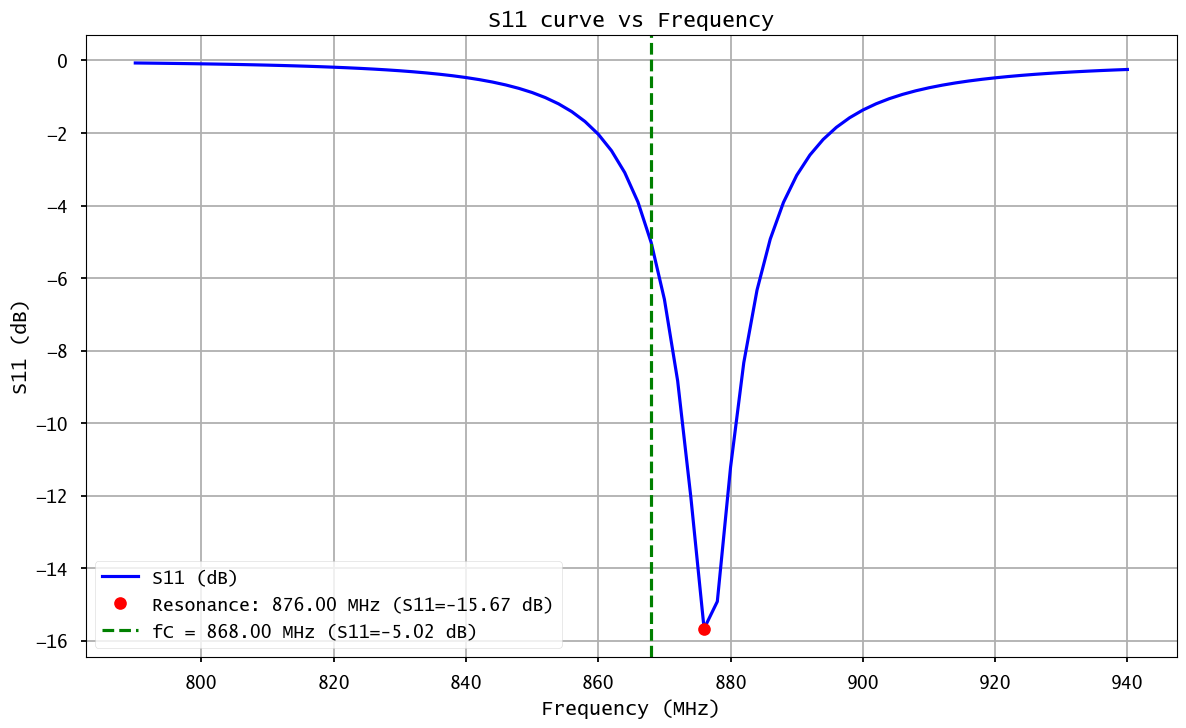


Ratio = 1.0092165898617511


Looking for matching!!!

feed result = 36.018 mm

------------------------------------------------------Iteration N°5------------------------------------------------------

distance meanders = 0.970 mm

Number of meanders = 4

New distance meanders = 1.280 mm
IFA track width = 0.970 mm
feed position = 36.018 mm

Z0 = 50 Ohms
Simulation 1/76 | f = 790.00 MHz | S11 = -0.07 dB
Simulation 2/76 | f = 792.00 MHz | S11 = -0.08 dB
Simulation 3/76 | f = 794.00 MHz | S11 = -0.08 dB
Simulation 4/76 | f = 796.00 MHz | S11 = -0.08 dB
Simulation 5/76 | f = 798.00 MHz | S11 = -0.09 dB
Simulation 6/76 | f = 800.00 MHz | S11 = -0.10 dB
Simulation 7/76 | f = 802.00 MHz | S11 = -0.10 dB
Simulation 8/76 | f = 804.00 MHz | S11 = -0.11 dB
Simulation 9/76 | f = 806.00 MHz | S11 = -0.12 dB
Simulation 10/76 | f = 808.00 MHz | S11 = -0.12 dB
Simulation 11/76 | f = 810.00 MHz | S11 = -0.13 dB
Simulation 12/76 | f = 812.00 MHz | S11 = -0.14 dB
Simulation 13/76 | f = 814.00 MHz | S11 

Simulation 40/76 | f = 868.00 MHz | S11 = -6.11 dB
Simulation 41/76 | f = 870.00 MHz | S11 = -8.16 dB
Simulation 42/76 | f = 872.00 MHz | S11 = -11.11 dB
Simulation 43/76 | f = 874.00 MHz | S11 = -14.86 dB
Simulation 44/76 | f = 876.00 MHz | S11 = -15.58 dB
Simulation 45/76 | f = 878.00 MHz | S11 = -12.02 dB
Simulation 46/76 | f = 880.00 MHz | S11 = -8.89 dB
Simulation 47/76 | f = 882.00 MHz | S11 = -6.71 dB
Simulation 48/76 | f = 884.00 MHz | S11 = -5.19 dB
Simulation 49/76 | f = 886.00 MHz | S11 = -4.10 dB
Simulation 50/76 | f = 888.00 MHz | S11 = -3.30 dB
Simulation 51/76 | f = 890.00 MHz | S11 = -2.70 dB
Simulation 52/76 | f = 892.00 MHz | S11 = -2.25 dB
Simulation 53/76 | f = 894.00 MHz | S11 = -1.90 dB
Simulation 54/76 | f = 896.00 MHz | S11 = -1.62 dB
Simulation 55/76 | f = 898.00 MHz | S11 = -1.40 dB
Simulation 56/76 | f = 900.00 MHz | S11 = -1.22 dB
Simulation 57/76 | f = 902.00 MHz | S11 = -1.07 dB
Simulation 58/76 | f = 904.00 MHz | S11 = -0.95 dB
Simulation 59/76 | f = 906.


📡 Simulation results:
→ Resonance frequency = 876.00 MHz
→ Impedance at f_res  = 51.83-17.08j Ω


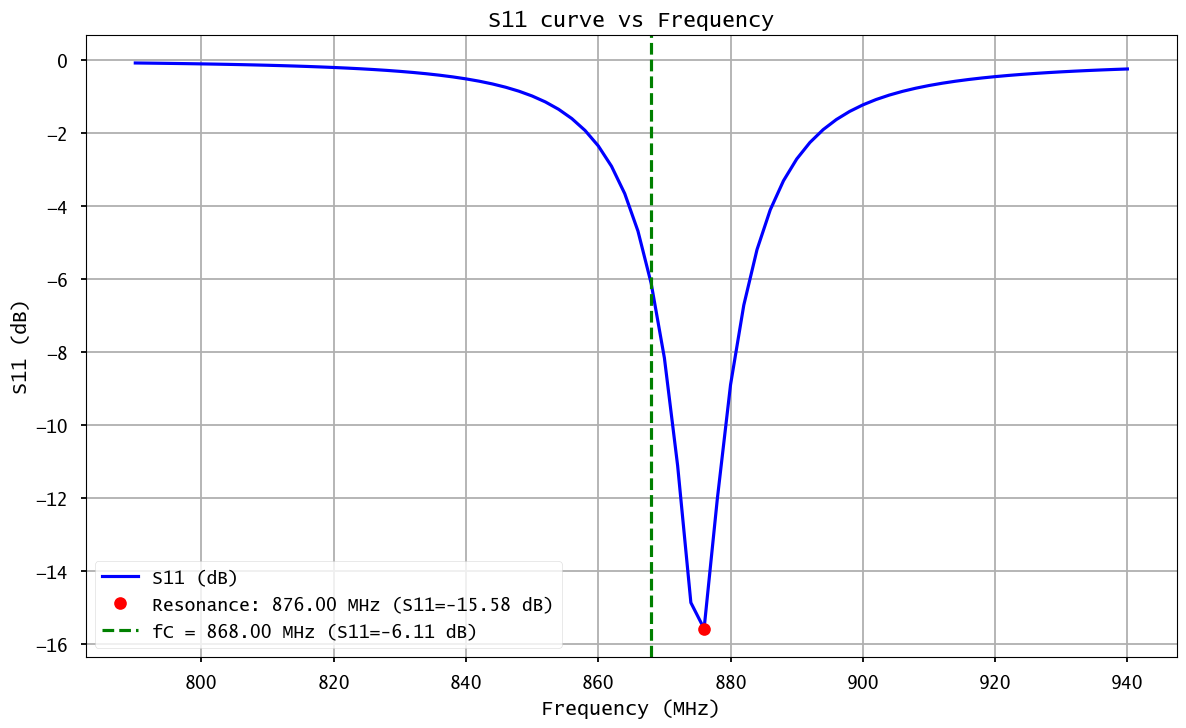


Ratio = 1.0092165898617511


Looking for matching!!!

feed result = 36.045 mm

------------------------------------------------------Iteration N°6------------------------------------------------------

distance meanders = 0.952 mm

Number of meanders = 4

New distance meanders = 1.298 mm
IFA track width = 0.952 mm
feed position = 36.045 mm

Z0 = 50 Ohms
Simulation 1/76 | f = 790.00 MHz | S11 = -0.07 dB
Simulation 2/76 | f = 792.00 MHz | S11 = -0.08 dB
Simulation 3/76 | f = 794.00 MHz | S11 = -0.08 dB
Simulation 4/76 | f = 796.00 MHz | S11 = -0.09 dB
Simulation 5/76 | f = 798.00 MHz | S11 = -0.09 dB
Simulation 6/76 | f = 800.00 MHz | S11 = -0.10 dB
Simulation 7/76 | f = 802.00 MHz | S11 = -0.11 dB
Simulation 8/76 | f = 804.00 MHz | S11 = -0.11 dB
Simulation 9/76 | f = 806.00 MHz | S11 = -0.12 dB
Simulation 10/76 | f = 808.00 MHz | S11 = -0.13 dB
Simulation 11/76 | f = 810.00 MHz | S11 = -0.14 dB
Simulation 12/76 | f = 812.00 MHz | S11 = -0.15 dB
Simulation 13/76 | f = 814.00 MHz | S11 

Simulation 40/76 | f = 868.00 MHz | S11 = -7.73 dB
Simulation 41/76 | f = 870.00 MHz | S11 = -10.50 dB
Simulation 42/76 | f = 872.00 MHz | S11 = -14.17 dB
Simulation 43/76 | f = 874.00 MHz | S11 = -15.74 dB
Simulation 44/76 | f = 876.00 MHz | S11 = -12.51 dB
Simulation 45/76 | f = 878.00 MHz | S11 = -9.26 dB
Simulation 46/76 | f = 880.00 MHz | S11 = -6.96 dB
Simulation 47/76 | f = 882.00 MHz | S11 = -5.36 dB
Simulation 48/76 | f = 884.00 MHz | S11 = -4.22 dB
Simulation 49/76 | f = 886.00 MHz | S11 = -3.39 dB
Simulation 50/76 | f = 888.00 MHz | S11 = -2.77 dB
Simulation 51/76 | f = 890.00 MHz | S11 = -2.30 dB
Simulation 52/76 | f = 892.00 MHz | S11 = -1.93 dB
Simulation 53/76 | f = 894.00 MHz | S11 = -1.65 dB
Simulation 54/76 | f = 896.00 MHz | S11 = -1.42 dB
Simulation 55/76 | f = 898.00 MHz | S11 = -1.24 dB
Simulation 56/76 | f = 900.00 MHz | S11 = -1.09 dB
Simulation 57/76 | f = 902.00 MHz | S11 = -0.96 dB
Simulation 58/76 | f = 904.00 MHz | S11 = -0.86 dB
Simulation 59/76 | f = 906.


📡 Simulation results:
→ Resonance frequency = 874.00 MHz
→ Impedance at f_res  = 54.73-16.67j Ω


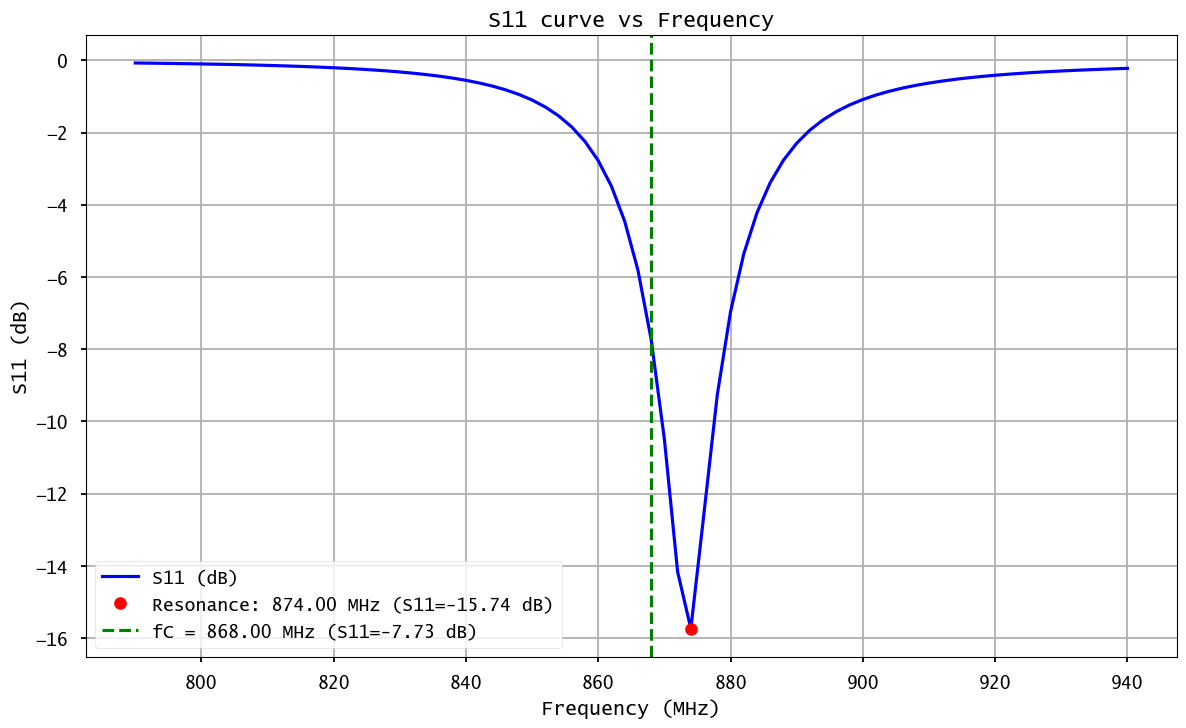


Ratio = 1.0069124423963134


Looking for matching!!!

feed result = 36.072 mm

------------------------------------------------------Iteration N°7------------------------------------------------------

distance meanders = 0.939 mm

Number of meanders = 4

New distance meanders = 1.311 mm
IFA track width = 0.939 mm
feed position = 36.072 mm

Z0 = 50 Ohms
Simulation 1/76 | f = 790.00 MHz | S11 = -0.08 dB
Simulation 2/76 | f = 792.00 MHz | S11 = -0.08 dB
Simulation 3/76 | f = 794.00 MHz | S11 = -0.08 dB
Simulation 4/76 | f = 796.00 MHz | S11 = -0.09 dB
Simulation 5/76 | f = 798.00 MHz | S11 = -0.10 dB
Simulation 6/76 | f = 800.00 MHz | S11 = -0.10 dB
Simulation 7/76 | f = 802.00 MHz | S11 = -0.11 dB
Simulation 8/76 | f = 804.00 MHz | S11 = -0.12 dB
Simulation 9/76 | f = 806.00 MHz | S11 = -0.13 dB
Simulation 10/76 | f = 808.00 MHz | S11 = -0.13 dB
Simulation 11/76 | f = 810.00 MHz | S11 = -0.14 dB
Simulation 12/76 | f = 812.00 MHz | S11 = -0.16 dB
Simulation 13/76 | f = 814.00 MHz | S11 

Simulation 40/76 | f = 868.00 MHz | S11 = -8.83 dB
Simulation 41/76 | f = 870.00 MHz | S11 = -12.06 dB
Simulation 42/76 | f = 872.00 MHz | S11 = -15.53 dB
Simulation 43/76 | f = 874.00 MHz | S11 = -14.52 dB
Simulation 44/76 | f = 876.00 MHz | S11 = -10.89 dB
Simulation 45/76 | f = 878.00 MHz | S11 = -8.09 dB
Simulation 46/76 | f = 880.00 MHz | S11 = -6.14 dB
Simulation 47/76 | f = 882.00 MHz | S11 = -4.78 dB
Simulation 48/76 | f = 884.00 MHz | S11 = -3.79 dB
Simulation 49/76 | f = 886.00 MHz | S11 = -3.07 dB
Simulation 50/76 | f = 888.00 MHz | S11 = -2.52 dB
Simulation 51/76 | f = 890.00 MHz | S11 = -2.11 dB
Simulation 52/76 | f = 892.00 MHz | S11 = -1.78 dB
Simulation 53/76 | f = 894.00 MHz | S11 = -1.53 dB
Simulation 54/76 | f = 896.00 MHz | S11 = -1.32 dB
Simulation 55/76 | f = 898.00 MHz | S11 = -1.16 dB
Simulation 56/76 | f = 900.00 MHz | S11 = -1.02 dB
Simulation 57/76 | f = 902.00 MHz | S11 = -0.91 dB
Simulation 58/76 | f = 904.00 MHz | S11 = -0.81 dB
Simulation 59/76 | f = 906.


📡 Simulation results:
→ Resonance frequency = 872.00 MHz
→ Impedance at f_res  = 65.27-11.94j Ω


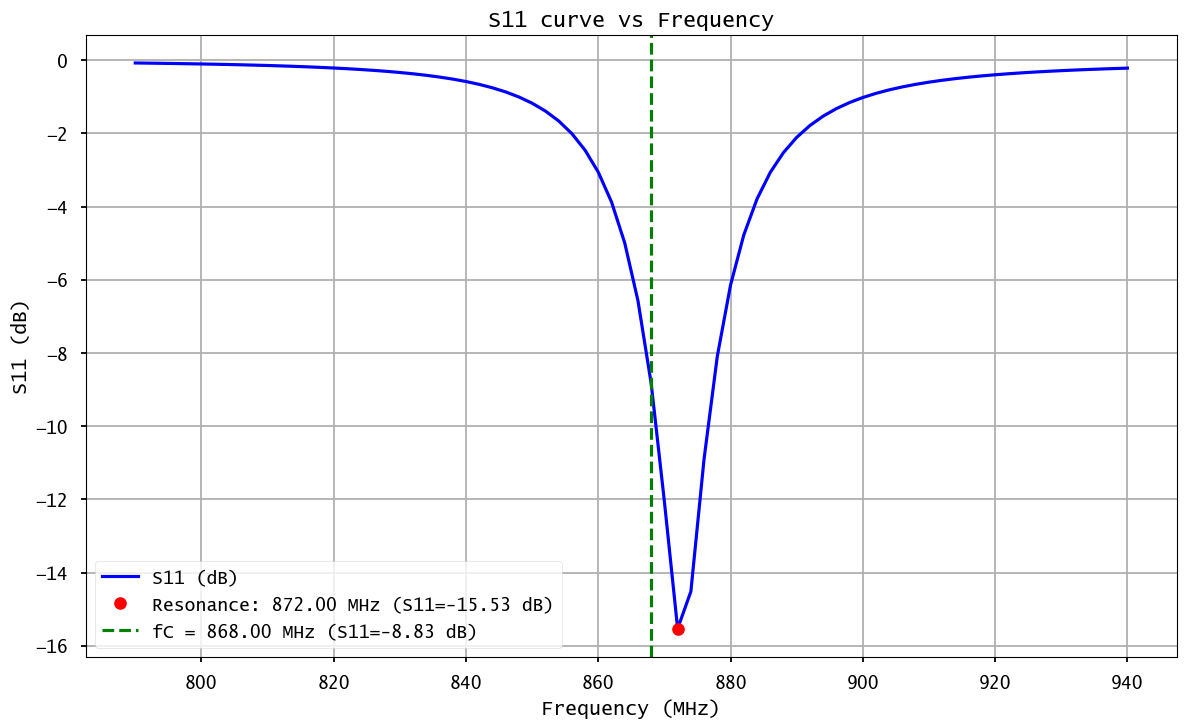


Ratio = 1.0046082949308757


Looking for matching!!!

feed result = 36.091 mm

------------------------------------------------------Iteration N°8------------------------------------------------------

distance meanders = 0.931 mm

Number of meanders = 4

New distance meanders = 1.319 mm
IFA track width = 0.931 mm
feed position = 36.091 mm

Z0 = 50 Ohms
Simulation 1/76 | f = 790.00 MHz | S11 = -0.08 dB
Simulation 2/76 | f = 792.00 MHz | S11 = -0.08 dB
Simulation 3/76 | f = 794.00 MHz | S11 = -0.09 dB
Simulation 4/76 | f = 796.00 MHz | S11 = -0.09 dB
Simulation 5/76 | f = 798.00 MHz | S11 = -0.10 dB
Simulation 6/76 | f = 800.00 MHz | S11 = -0.10 dB
Simulation 7/76 | f = 802.00 MHz | S11 = -0.11 dB
Simulation 8/76 | f = 804.00 MHz | S11 = -0.12 dB
Simulation 9/76 | f = 806.00 MHz | S11 = -0.13 dB
Simulation 10/76 | f = 808.00 MHz | S11 = -0.14 dB
Simulation 11/76 | f = 810.00 MHz | S11 = -0.15 dB
Simulation 12/76 | f = 812.00 MHz | S11 = -0.16 dB
Simulation 13/76 | f = 814.00 MHz | S11 

Simulation 40/76 | f = 868.00 MHz | S11 = -10.14 dB
Simulation 41/76 | f = 870.00 MHz | S11 = -13.77 dB
Simulation 42/76 | f = 872.00 MHz | S11 = -15.84 dB
Simulation 43/76 | f = 874.00 MHz | S11 = -12.83 dB
Simulation 44/76 | f = 876.00 MHz | S11 = -9.47 dB
Simulation 45/76 | f = 878.00 MHz | S11 = -7.10 dB
Simulation 46/76 | f = 880.00 MHz | S11 = -5.44 dB
Simulation 47/76 | f = 882.00 MHz | S11 = -4.27 dB
Simulation 48/76 | f = 884.00 MHz | S11 = -3.42 dB
Simulation 49/76 | f = 886.00 MHz | S11 = -2.79 dB
Simulation 50/76 | f = 888.00 MHz | S11 = -2.31 dB
Simulation 51/76 | f = 890.00 MHz | S11 = -1.94 dB
Simulation 52/76 | f = 892.00 MHz | S11 = -1.65 dB
Simulation 53/76 | f = 894.00 MHz | S11 = -1.42 dB
Simulation 54/76 | f = 896.00 MHz | S11 = -1.23 dB
Simulation 55/76 | f = 898.00 MHz | S11 = -1.08 dB
Simulation 56/76 | f = 900.00 MHz | S11 = -0.96 dB
Simulation 57/76 | f = 902.00 MHz | S11 = -0.85 dB
Simulation 58/76 | f = 904.00 MHz | S11 = -0.77 dB
Simulation 59/76 | f = 906.


📡 Simulation results:
→ Resonance frequency = 872.00 MHz
→ Impedance at f_res  = 56.52-16.13j Ω


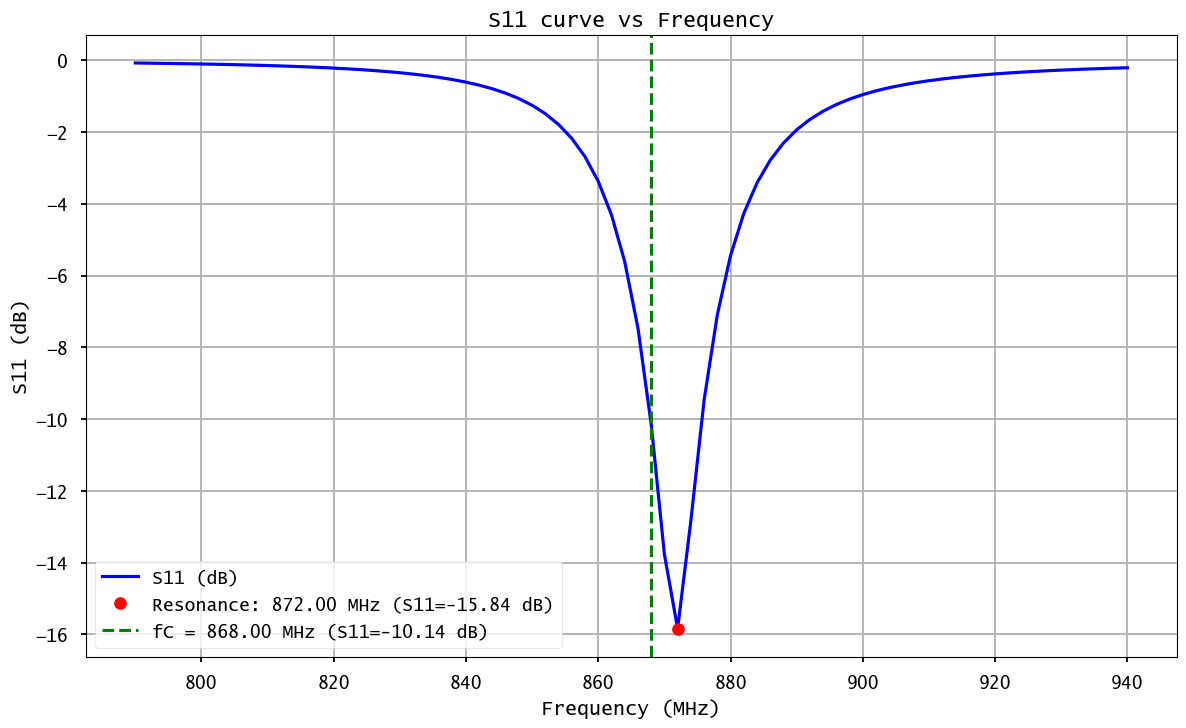


Ratio = 1.0046082949308757


Required accuracy is met!
Simulation time: 4 minutes and 42.42 seconds
Convergence reached at iteration 8
Optimization parameters saved to data/log_optimization_JP/optimization_results_JP_0.17999999999999997.json


In [8]:
optimize_ifa(ifa_meander_msh, ifa_meander_mat,
             frequencies, fC, fLow, fHigh, nPoints, fc_index,
             a, b, largeur_piste, distance_meandre, feed, feed_point, x_t, y_t, save_mesh_folder, mesh_name, mesh_size, filename_log)